In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
#import pandas as pd
#from rasterio.crs import CRS
#from rasterio.transform import from_origin
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
import geojson
import matplotlib
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import subprocess
import firedrake
import icepack
import math
import icepack.plot
from firedrake import assemble, Constant, inner, grad, dx
from icepack.statistics import (
    StatisticsProblem,
    MaximumProbabilityEstimator,
)
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
outline_2020 = '/home/sermilik/brunt_model/d01_pre_calving/brunt_HC_2020.geojson'
outline_calv = '/home/sermilik/brunt_model/d02_calving/brunt_HC_2021_calving.geojson'
outline_2021 = '/home/sermilik/brunt_model/d03_post_calving/brunt_HC_2021.geojson'

with open(outline_2020,"r") as outline_file_2020:
    outline_2020 = geojson.load(outline_file_2020)
    
with open(outline_calv,"r") as outline_file_calv:
    outline_calv = geojson.load(outline_file_calv)

with open(outline_2021,"r") as outline_file_2021:
    outline_2021 = geojson.load(outline_file_2021)


In [3]:
pre_outline = [
( -606837.6, 1437110.4 ),( -610183.2, 1437503.2 ),( -615426.3, 1434163.1 ),( -614941.4, 1430772.5 ),( -627707.1, 1422470.6 ),( -627707.1, 1422470.6 ),( -634967.3, 1419676.9 ),( -643370.1, 1412098.9 ),( -646085.9, 1407167.4 ),( -645495.2, 1405566.9 ),( -650852.7, 1403200.7 ),( -653614.5, 1399491.6 ),( -653840.4, 1396359.7 ),( -662256.4, 1391003.6 ),( -664387.2, 1391078.8 ),( -666392.8, 1386979.7 ),( -671966.0, 1381936.3 ), ( -673018.5, 1375798.3 ),( -676963.7, 1370930.0 ),( -677400.2, 1365695.3 ),( -681830.9, 1361740.6 ),( -681770.4, 1361316.1 ),
( -681770.4, 1361316.1 ), ( -682181.4, 1361602.4 ), ( -683145.5, 1361417.3 ), ( -683477.2, 1361594.7 ), ( -683870.5, 1361517.6 ), ( -683916.8, 1361964.9 ), ( -684803.8, 1361641.0 ), ( -685251.2, 1362304.3 ), ( -686045.6, 1364039.7 ), ( -686732.0, 1364494.8 ), ( -686739.8, 1365088.7 ), ( -686870.9, 1365127.3 ), ( -687187.1, 1364093.7 ), ( -687335.1, 1364122.9 ), ( -687411.3, 1365006.4 ), ( -687398.6, 1365610.2 ), ( -687169.8, 1366373.0 ), ( -687111.8, 1366973.3 ), ( -687214.7, 1367395.7 ), ( -687447.7, 1367498.7 ), ( -687691.4, 1368208.2 ), ( -687642.6, 1368679.5 ), ( -687805.4, 1368716.0 ), ( -687906.6, 1368821.9 ), ( -687921.0, 1368990.5 ), ( -687844.0, 1369192.7 ), ( -688022.1, 1369698.3 ), ( -688075.1, 1370199.1 ), ( -688325.5, 1370666.2 ), ( -688575.9, 1370743.3 ), ( -689298.2, 1371436.7 ), ( -689272.4, 1371644.4 ), ( -689990.9, 1371812.5 ), ( -690342.5, 1371466.1 ), ( -690826.5, 1371817.6 ), ( -691025.2, 1371863.5 ), ( -691300.4, 1372199.8 ), ( -691509.3, 1372260.9 ), ( -691770.4, 1372545.4 ), ( -692007.0, 1372604.6 ), ( -692110.6, 1372893.0 ), ( -692391.6, 1372937.4 ), ( -692643.1, 1373506.9 ), ( -692938.9, 1373728.8 ), ( -692968.5, 1374261.3 ), ( -693227.4, 1374719.8 ), ( -693242.2, 1374904.7 ), ( -693464.0, 1375097.0 ), ( -693922.6, 1375185.8 ), ( -694654.8, 1375681.3 ), ( -695032.0, 1376184.3 ), ( -695321.4, 1376365.4 ), ( -695542.5, 1376625.9 ), ( -695901.8, 1376866.8 ), ( -696328.2, 1377028.6 ), ( -696576.9, 1377127.3 ), ( -696908.6, 1377597.2 ), ( -697082.3, 1377889.3 ), ( -697323.1, 1378031.4 ), ( -697789.0, 1378276.2 ), ( -698231.2, 1378398.6 ), ( -698506.4, 1378478.0 ), ( -698799.4, 1378735.7 ), ( -699046.6, 1378922.7 ), ( -699335.5, 1379043.3 ), ( -699859.1, 1379059.9 ), ( -700102.7, 1379527.7 ), ( -700289.3, 1379617.2 ), ( -700520.8, 1379691.9 ), ( -700797.0, 1380065.2 ), ( -701147.9, 1380304.1 ), ( -701625.7, 1380528.1 ), ( -701842.2, 1380640.0 ), ( -702312.5, 1380669.9 ), ( -702558.9, 1380834.2 ), ( -702850.1, 1380886.4 ), ( -703215.9, 1380893.9 ), ( -704583.5, 1381440.7 ), ( -704987.2, 1381440.7 ), ( -705325.7, 1381610.0 ), ( -705573.2, 1382078.8 ), ( -706367.5, 1382495.5 ), ( -707096.8, 1383094.5 ), ( -708021.3, 1383524.2 ), ( -708412.0, 1383745.6 ), ( -709089.2, 1383719.6 ), ( -709336.6, 1383823.8 ), ( -709987.7, 1383862.8 ), ( -710782.0, 1384305.6 ), ( -711211.8, 1384422.8 ), ( -711524.3, 1384344.6 ), ( -711829.7, 1384511.6 ), ( -712623.9, 1384702.5 ), ( -713234.9, 1384603.3 ), ( -713769.4, 1384649.1 ), ( -714105.5, 1384817.1 ), ( -714410.9, 1385305.8 ), ( -714808.0, 1385634.2 ), ( -715075.3, 1385764.0 ), ( -715525.9, 1386527.7 ), ( -716075.7, 1386825.5 ), ( -717152.5, 1387108.1 ), ( -717756.6, 1387174.4 ), ( -718704.3, 1387111.2 ), ( -719146.6, 1386795.3 ), ( -719424.5, 1386782.7 ), ( -720511.2, 1385872.9 ), ( -721294.6, 1385822.3 ), ( -722115.9, 1385430.6 ), ( -722393.9, 1385102.1 ), ( -723189.9, 1384824.1 ), ( -724402.9, 1384811.5 ), ( -724933.6, 1385038.9 ), ( -725527.5, 1385076.9 ), ( -726007.6, 1384900.0 ), ( -726984.1, 1385566.0 ), ( -727557.5, 1385636.5 ), ( -728704.5, 1386531.9 ), ( -729660.2, 1387065.1 ), ( -729921.8, 1387175.8 ), ( -730324.2, 1387095.3 ), ( -730817.2, 1387236.1 ), ( -731088.9, 1387407.2 ), ( -731551.7, 1387477.6 ), ( -732326.3, 1388051.0 ), ( -732598.0, 1388352.9 ), ( -733080.6, 1388560.2 ), ( -733751.9, 1388665.7 ), ( -733857.4, 1389154.8 ), ( -734327.3, 1390017.9 ), ( -734058.8, 1390612.5 ), ( -734135.5, 1391523.6 ), ( -734471.2, 1392041.4 ), ( -734509.6, 1392405.9 ), ( -734394.5, 1393086.8 ), ( -734080.4, 1393611.6 ), ( -733973.4, 1393937.0 ), ( -733554.3, 1394128.7 ), ( -733505.3, 1394258.0 ), ( -733135.3, 1394619.2 ), ( -732863.3, 1394859.9 ), ( -732661.0, 1395056.7 ), ( -732559.2, 1395404.6 ), ( -732381.1, 1395803.3 ), ( -732372.6, 1396210.5 ), ( -732423.5, 1396677.2 ), ( -732287.7, 1397050.5 ), ( -732236.8, 1397296.5 ), ( -732084.1, 1397559.5 ), ( -732075.6, 1397754.6 ), ( -731626.0, 1398017.6 ), ( -731609.0, 1398509.7 ), ( -731562.2, 1398644.6 ), ( -731220.4, 1398660.7 ), ( -730907.7, 1398747.7 ), ( -730649.7, 1398799.3 ), ( -730391.7, 1398947.7 ), ( -730272.4, 1398973.5 ), ( -729828.8, 1399329.6 ), ( -729781.0, 1399831.8 ), ( -729677.3, 1400055.0 ), ( -729470.1, 1400230.4 ), ( -729254.8, 1400740.6 ), ( -728959.9, 1401123.2 ), ( -728856.2, 1401960.3 ), ( -728424.2, 1402858.9 ), ( -728269.7, 1403640.7 ), ( -728260.6, 1405031.4 ), ( -728542.4, 1405640.4 ), ( -728496.9, 1406004.0 ), ( -728215.2, 1406513.0 ), ( -728024.3, 1406913.0 ), ( -727329.0, 1407332.5 ), ( -726855.0, 1407921.8 ), ( -726778.1, 1408383.0 ), ( -726637.2, 1408523.9 ), ( -726265.7, 1408370.1 ), ( -725778.9, 1408447.0 ), ( -725343.4, 1408523.9 ), ( -724831.0, 1408959.4 ), ( -724152.1, 1409664.0 ), ( -723665.3, 1409984.2 ), ( -723383.5, 1410509.4 ), ( -722704.5, 1411265.2 ), ( -722076.3, 1411877.7 ), ( -721764.9, 1412068.3 ), ( -721409.1, 1412532.2 ), ( -721250.2, 1413116.8 ), ( -720996.1, 1413606.0 ), ( -720456.0, 1413618.7 ), ( -719992.1, 1413961.9 ), ( -719795.1, 1414807.0 ), ( -718944.3, 1414727.4 ), ( -718790.3, 1415343.2 ), ( -718251.5, 1416513.3 ), ( -717589.4, 1416836.7 ), ( -716049.8, 1416929.0 ), ( -715972.8, 1417206.2 ), ( -715295.4, 1417313.9 ), ( -714664.1, 1418083.8 ), ( -714094.5, 1418176.1 ), ( -713678.7, 1418330.1 ), ( -713724.9, 1418684.2 ), ( -712539.4, 1419346.3 ), ( -711867.0, 1419860.3 ), ( -711466.1, 1419993.9 ), ( -710904.8, 1420181.0 ), ( -710523.9, 1420448.3 ), ( -710490.5, 1420588.6 ), ( -709555.0, 1420876.0 ), ( -708786.6, 1421063.1 ), ( -708532.7, 1421497.4 ), ( -707663.7, 1421490.0 ), ( -707460.0, 1422101.2 ), ( -706741.5, 1421843.8 ), ( -706087.3, 1421918.9 ), ( -705293.8, 1422229.9 ), ( -705304.5, 1423012.7 ), ( -704866.5, 1423373.0 ),    
( -704866.5, 1423373.0 ), ( -704464.1, 1423373.4 ), ( -704260.1, 1423364.9 ), ( -703979.6, 1423398.9 ), ( -703682.0, 1423517.9 ), ( -703446.2, 1423675.2 ), ( -703240.0, 1423823.9 ), ( -703078.5, 1424002.5 ), ( -702877.0, 1424290.1 ), ( -702763.9, 1424606.0 ), ( -702755.4, 1424988.6 ), ( -702823.4, 1425252.1 ), ( -703293.3, 1425747.4 ), ( -703703.6, 1425904.1 ), ( -704091.4, 1425911.5 ), ( -704464.3, 1425814.6 ),    
( -704464.3, 1425814.6 ), ( -704514.0, 1426274.4 ), ( -704186.7, 1426478.1 ), ( -704048.5, 1426921.7 ), ( -704783.2, 1426674.4 ), ( -705241.4, 1426143.5 ), ( -705634.1, 1425867.1 ), ( -706026.9, 1425728.9 ), ( -706595.2, 1425428.5 ), ( -706911.9, 1425704.9 ), ( -707857.3, 1425535.7 ), ( -707917.1, 1425185.5 ), ( -708216.0, 1424972.0 ), ( -708506.4, 1425262.4 ), ( -709001.8, 1425048.8 ), ( -709172.6, 1424519.3 ), ( -709411.7, 1424246.0 ), ( -709676.5, 1423981.2 ), ( -710095.0, 1424160.6 ), ( -710462.3, 1423904.3 ), ( -710855.2, 1423520.0 ), ( -711008.9, 1423178.4 ), ( -711538.5, 1422708.6 ), ( -711683.7, 1423144.2 ), ( -711939.9, 1423554.2 ), ( -712213.2, 1423972.7 ), ( -712203.9, 1424343.2 ), ( -712318.3, 1424438.5 ), ( -712561.5, 1424543.4 ), ( -712971.5, 1425148.9 ), ( -713009.6, 1425797.3 ), ( -713085.9, 1425959.4 ), ( -713367.2, 1426264.5 ), ( -713409.8, 1426698.5 ), ( -713547.4, 1426912.6 ), ( -713581.9, 1427348.4 ), ( -713547.4, 1427673.4 ), ( -713704.2, 1427941.0 ), ( -713704.1, 1428379.8 ), ( -713843.4, 1428426.2 ), ( -714075.6, 1428565.5 ), ( -714160.0, 1428899.0 ), ( -714265.5, 1429038.3 ), ( -714290.9, 1429287.4 ), ( -714214.9, 1429460.5 ), ( -714050.2, 1429903.7 ), ( -713684.3, 1430961.2 ), ( -713374.2, 1431638.8 ), ( -713201.9, 1432385.3 ), ( -713213.4, 1433028.4 ), ( -713466.1, 1433373.0 ), ( -713374.2, 1433832.4 ), ( -713741.7, 1434647.8 ), ( -713753.2, 1435290.9 ), ( -713802.3, 1435450.7 ), ( -714007.5, 1435695.1 ), ( -713895.1, 1435905.2 ), ( -713870.7, 1436056.7 ), ( -713768.1, 1436213.1 ), ( -713880.7, 1436550.2 ), ( -713984.0, 1437309.4 ), ( -714020.4, 1437868.2 ), ( -714117.6, 1438111.2 ), ( -714002.2, 1438512.0 ), ( -713892.7, 1438826.8 ), ( -713614.0, 1439158.6 ), ( -713560.9, 1439364.4 ), ( -713348.5, 1439590.0 ), ( -713182.6, 1439988.2 ), ( -712864.1, 1440187.3 ), ( -712837.5, 1440572.2 ), ( -712658.3, 1441189.4 ), ( -712605.2, 1441793.3 ), ( -712572.1, 1442237.9 ), ( -712392.9, 1442317.6 ), ( -712154.0, 1442317.6 ), ( -712134.1, 1442675.9 ), ( -712266.0, 1443100.8 ), ( -712149.2, 1444044.3 ), ( -711610.1, 1444394.7 ), ( -711601.1, 1444538.5 ), ( -711259.6, 1444924.8 ), ( -711124.9, 1445580.8 ), ( -710810.4, 1445598.7 ), ( -710657.6, 1445904.2 ), ( -710397.0, 1445994.1 ), ( -710019.6, 1446066.0 ), ( -709705.2, 1446443.4 ), ( -709471.5, 1446497.3 ), ( -709304.7, 1446833.6 ), ( -709304.7, 1447215.6 ), ( -709133.5, 1447373.6 ), ( -709140.1, 1447689.8 ), ( -708744.9, 1447973.0 ), ( -708580.2, 1448196.9 ), ( -708112.6, 1448354.9 ), ( -707631.9, 1448657.9 ), ( -707414.5, 1448987.2 ), ( -707065.5, 1449316.5 ), ( -706853.0, 1449749.6 ), ( -706745.2, 1450216.8 ), ( -706781.1, 1450675.0 ), ( -706844.0, 1451043.4 ), ( -706844.0, 1451330.9 ), ( -706610.4, 1451798.1 ), ( -706421.7, 1452040.7 ), ( -706224.1, 1452130.5 ), ( -706124.3, 1452619.7 ), ( -705951.3, 1453147.3 ), ( -705614.0, 1452939.7 ), ( -705363.2, 1452931.1 ), ( -705467.0, 1453173.3 ), ( -705864.8, 1453657.6 ), ( -706150.3, 1454375.6 ), ( -706176.2, 1454643.7 ), ( -706349.2, 1454868.6 ), ( -706245.4, 1455387.6 ), ( -706401.1, 1455638.4 ), ( -706617.4, 1455880.6 ), ( -706637.1, 1456046.3 ), ( -706345.2, 1456367.3 ), ( -706199.3, 1456608.1 ), ( -705827.2, 1456907.3 ), ( -705768.8, 1457184.5 ), ( -705929.4, 1457636.9 ), ( -705900.2, 1458125.8 ), ( -705739.7, 1458315.5 ), ( -705455.1, 1458359.2 ), ( -705374.8, 1458694.9 ), ( -705381.3, 1459432.9 ), ( -705407.7, 1459696.7 ), ( -705534.3, 1459891.9 ), ( -705597.6, 1460340.3 ), ( -705951.0, 1460915.3 ), ( -706077.7, 1461522.0 ), ( -706172.6, 1461696.1 ), ( -706109.3, 1461843.8 ), ( -705914.1, 1462075.9 ), ( -705683.0, 1462745.8 ), ( -705722.5, 1463318.6 ), ( -706058.3, 1463713.7 ), ( -705979.3, 1464661.8 ), ( -706295.3, 1465353.2 ), ( -706275.6, 1466084.0 ), ( -706571.8, 1466834.6 ), ( -706986.7, 1467446.9 ), ( -706927.4, 1468237.1 ), ( -707164.4, 1468948.1 ), ( -707243.4, 1469698.7 ), ( -707618.7, 1470172.8 ), ( -707836.0, 1471140.7 ), ( -708152.1, 1471871.5 ), ( -708468.1, 1472108.6 ), ( -708132.3, 1472878.9 ), ( -708148.0, 1473887.5 ), ( -707992.3, 1475150.5 ), ( -707975.0, 1476102.0 ), ( -707455.9, 1476724.9 ), ( -707248.3, 1477659.2 ), ( -706833.1, 1478160.9 ), ( -706971.5, 1479043.3 ), ( -707231.0, 1479493.1 ), ( -707577.0, 1479683.5 ), ( -707646.2, 1480012.2 ), ( -708182.6, 1480444.7 ), ( -708256.3, 1482248.2 ), ( -707908.3, 1483070.7 ), ( -707243.9, 1483909.1 ), ( -706832.7, 1483924.9 ), ( -706421.4, 1483450.4 ), ( -705314.1, 1483213.1 ), ( -704997.7, 1483830.0 ), ( -704507.4, 1484589.3 ), ( -704412.5, 1485237.8 ), ( -703542.5, 1485522.5 ), ( -702814.8, 1485411.8 ), ( -701681.8, 1485937.0 ), ( -701180.3, 1487220.7 ), ( -700077.1, 1488504.4 ), ( -699154.4, 1488905.6 ),    
( -699154.4, 1488905.6 ), ( -606837.6, 1437110.4 )    
]

pre_poly = Polygon(pre_outline)

calve_outline = [
( -606837.6, 1437110.4 ), ( -610183.2, 1437503.2 ), ( -615426.3, 1434163.1 ), ( -614941.4, 1430772.5 ), ( -627707.1, 1422470.6 ), ( -634967.3, 1419676.9 ), ( -643370.1, 1412098.9 ), ( -646085.9, 1407167.4 ), ( -645495.2, 1405566.9 ), ( -650852.7, 1403200.7 ), ( -653614.5, 1399491.6 ), ( -653840.4, 1396359.7 ), ( -662256.4, 1391003.6 ), ( -664387.2, 1391078.8 ), ( -666392.8, 1386979.7 ), ( -671966.0, 1381936.3 ), ( -673018.5, 1375798.3 ), ( -676963.7, 1370930.0 ), ( -677400.2, 1365695.3 ), ( -681830.9, 1361740.6 ), ( -681770.4, 1361316.1 ), 
( -681770.4, 1361316.1 ), ( -684916.3, 1361504.0 ), ( -686289.7, 1363718.0 ), ( -687825.9, 1364577.8 ), ( -687556.8, 1367068.9 ), ( -688120.4, 1368564.4 ), ( -688965.7, 1370428.5 ), ( -690656.4, 1371295.5 ), ( -690959.9, 1371013.8 ), ( -693777.7, 1373125.9 ), ( -694019.7, 1374484.2 ), ( -695458.8, 1375210.5 ), ( -696238.9, 1376152.0 ), ( -697208.2, 1376586.4 ), ( -697891.0, 1377458.8 ), ( -699218.6, 1378027.8 ), ( -701532.5, 1379658.9 ), ( -704415.3, 1380910.7 ), ( -706273.9, 1381593.4 ), ( -707563.6, 1382465.9 ), ( -708853.3, 1383186.6 ), ( -710552.5, 1383365.5 ), ( -711369.2, 1383829.0 ), ( -712207.9, 1383917.3 ), ( -713333.5, 1384226.3 ), ( -714547.5, 1384204.2 ), ( -715629.0, 1385197.4 ), ( -716247.0, 1386058.2 ), ( -717725.7, 1386610.0 ), ( -718365.8, 1386985.2 ), ( -719491.5, 1386720.3 ), ( -720595.0, 1386080.3 ), ( -721367.5, 1385418.1 ), ( -721963.5, 1385550.6 ), ( -723657.3, 1384464.6 ), ( -725302.8, 1384486.0 ), ( -726670.5, 1384550.1 ), ( -728252.0, 1385469.0 ), ( -728978.6, 1385917.8 ), ( -729747.9, 1386323.9 ), ( -730047.1, 1386665.8 ), ( -730698.1, 1386730.0 ), ( -731720.9, 1387145.5 ), ( -732360.1, 1387305.4 ), ( -733265.7, 1388093.7 ), ( -734360.2, 1388243.5 ), ( -734616.8, 1389059.7 ), ( -734966.6, 1389526.1 ), ( -734640.1, 1390832.0 ), ( -735176.4, 1391974.7 ), ( -734500.2, 1393024.1 ), ( -732961.0, 1394819.7 ), ( -732891.1, 1396382.1 ), ( -731678.4, 1397734.7 ), ( -729853.9, 1399522.8 ), ( -729505.7, 1401394.2 ), ( -728939.9, 1403178.6 ), ( -728896.4, 1404506.0 ), ( -729201.0, 1405768.1 ), ( -727503.7, 1407508.9 ), ( -726045.8, 1408052.9 ), ( -725110.1, 1408901.6 ), ( -724587.8, 1409010.4 ), ( -724000.3, 1409467.4 ), ( -723652.1, 1410555.4 ), ( -722576.3, 1411485.1 ), ( -722007.7, 1412246.6 ), ( -721652.3, 1413160.4 ), ( -719540.5, 1414744.3 ), ( -718911.0, 1416003.3 ), ( -717348.2, 1416474.4 ), ( -715711.4, 1417194.6 ), ( -714387.5, 1417812.9 ), ( -714409.3, 1418249.4 ), ( -712453.2, 1419464.6 ), ( -710128.5, 1420521.2 ), ( -709608.3, 1420521.2 ), ( -709283.2, 1420862.6 ), ( -709283.2, 1421155.2 ), ( -708145.2, 1421724.2 ), ( -707007.3, 1421415.4 ), ( -705934.3, 1422439.5 ), ( -705381.6, 1422715.9 ), ( -705089.0, 1422911.0 ), ( -705237.7, 1423407.6 ),
( -705237.7, 1423407.6 ), ( -704866.5, 1423373.0 ), ( -704464.1, 1423373.4 ), ( -704260.1, 1423364.9 ), ( -703979.6, 1423398.9 ), ( -703682.0, 1423517.9 ), ( -703446.2, 1423675.2 ), ( -703240.0, 1423823.9 ), ( -703078.5, 1424002.5 ), ( -702877.0, 1424290.1 ), ( -702763.9, 1424606.0 ), ( -702755.4, 1424988.6 ), ( -702823.4, 1425252.1 ), ( -703293.3, 1425747.4 ), ( -703703.6, 1425904.1 ), ( -703786.6, 1425906.7 ),
( -703786.6, 1425906.7 ), ( -703799.3, 1426423.3 ), ( -703534.4, 1426843.6 ), ( -702860.9, 1427488.4 ), ( -702112.5, 1428317.4 ), ( -701467.7, 1428812.5 ), ( -701370.0, 1429155.3 ), ( -701419.6, 1429388.8 ), ( -700952.4, 1430061.2 ), ( -700308.4, 1430853.9 ), ( -699310.4, 1432000.5 ), ( -698921.1, 1432453.5 ), ( -698441.4, 1433079.6 ), ( -697903.6, 1433818.3 ), ( -697197.5, 1434611.3 ), ( -696263.3, 1435328.3 ), ( -694035.6, 1437357.1 ), ( -692830.4, 1438648.8 ), ( -691717.5, 1439588.7 ), ( -691631.0, 1440194.2 ), ( -690290.4, 1441947.7 ), ( -689061.2, 1443460.0 ), ( -688416.7, 1445980.1 ), ( -688089.6, 1446353.9 ), ( -687902.7, 1447825.7 ), ( -686337.5, 1449063.9 ), ( -684445.1, 1450932.8 ), ( -682482.7, 1452942.0 ), ( -680753.9, 1454951.1 ), ( -678985.3, 1456627.5 ), ( -677382.0, 1457736.7 ), ( -676766.9, 1459360.2 ), ( -677694.5, 1461678.0 ), ( -677532.1, 1462951.6 ), ( -676972.8, 1463422.6 ), ( -677078.8, 1463958.3 ), ( -676832.8, 1465264.8 ), ( -676166.9, 1465818.2 ), ( -676223.1, 1466606.1 ), ( -676889.1, 1467562.9 ), ( -677433.2, 1468894.9 ), ( -677855.3, 1469298.2 ), ( -678018.0, 1470026.3 ), ( -677864.9, 1470609.9 ), ( -677463.1, 1471040.5 ), ( -677223.9, 1471872.8 ), ( -676659.5, 1472743.5 ), ( -676037.6, 1473260.1 ), ( -675597.5, 1473422.8 ), ( -675227.1, 1474310.8 ), ( -675195.6, 1475472.8 ),
( -675195.6, 1475472.8 ), ( -672193.0, 1473752.1 ), ( -668783.9, 1471832.9 ), ( -664541.5, 1469408.7 ), ( -661006.2, 1467413.8 ), ( -657285.9, 1465304.9 ), ( -650488.9, 1461569.7 ), ( -643122.6, 1457399.5 ), ( -639355.2, 1455235.3 ), ( -635026.7, 1452830.6 ), ( -630618.1, 1450345.7 ), ( -627091.2, 1448341.8 ), ( -623163.5, 1446177.6 ), ( -618434.2, 1443452.2 ), ( -613705.0, 1440887.2 ), ( -608237.9, 1437866.1 ), ( -606837.6, 1437110.4 ) 
]

calve_poly = Polygon(calve_outline)

post_outline = [
( -608237.9, 1437866.1 ), ( -610183.2, 1437503.2 ), ( -615426.3, 1434163.1 ), ( -614941.4, 1430772.5 ), ( -627707.1, 1422470.6 ), ( -634967.3, 1419676.9 ), ( -643370.1, 1412098.9 ), ( -646085.9, 1407167.4 ), ( -645495.2, 1405566.9 ), ( -650852.7, 1403200.7 ), ( -653614.5, 1399491.6 ), ( -653840.4, 1396359.7 ), ( -662256.4, 1391003.6 ), ( -664387.2, 1391078.8 ), ( -666392.8, 1386979.7 ), ( -671966.0, 1381936.3 ), ( -673018.5, 1375798.3 ), ( -676963.7, 1370930.0 ), ( -677400.2, 1365695.3 ), ( -681400.5, 1362119.1 ), ( -681770.4, 1361316.1 ),
( -681770.4, 1361316.1 ), ( -682319.4, 1361436.9 ), ( -683477.0, 1361271.6 ), ( -683973.1, 1361177.1 ), ( -684091.2, 1361566.9 ), ( -684433.7, 1361413.3 ), ( -685024.3, 1361295.2 ), ( -685520.4, 1361956.7 ), ( -686370.9, 1363445.0 ), ( -687150.5, 1363929.3 ), ( -687470.2, 1364047.2 ), ( -687525.0, 1363499.1 ), ( -687726.0, 1363398.7 ), ( -687890.4, 1364129.4 ), ( -687917.8, 1364997.2 ), ( -687735.1, 1365846.8 ), ( -687716.9, 1366285.2 ), ( -687817.3, 1366742.0 ), ( -688137.1, 1366833.3 ), ( -688374.6, 1367555.0 ), ( -688454.7, 1368393.9 ), ( -688729.8, 1368683.5 ), ( -689193.2, 1370001.1 ), ( -690293.6, 1370638.3 ), ( -690366.0, 1370898.9 ), ( -691090.0, 1371072.6 ), ( -691466.5, 1370696.2 ), ( -692187.7, 1371119.1 ), ( -693504.9, 1372198.3 ), ( -694139.7, 1372960.0 ), ( -694139.7, 1373515.5 ), ( -694409.6, 1374198.0 ), ( -695123.7, 1374467.8 ), ( -695901.4, 1374943.9 ), ( -696679.0, 1375816.8 ), ( -697710.6, 1376324.6 ), ( -698297.9, 1377213.4 ), ( -699012.0, 1377546.7 ), ( -699631.0, 1377673.6 ), ( -700107.1, 1378133.9 ), ( -700694.3, 1378340.2 ), ( -701041.5, 1378782.6 ), ( -701623.2, 1378886.5 ), ( -702038.6, 1379405.8 ), ( -702495.6, 1379572.0 ), ( -702724.1, 1379800.5 ), ( -703742.0, 1380008.2 ), ( -704967.6, 1380610.7 ), ( -705611.6, 1380984.6 ), ( -706525.6, 1380963.8 ), ( -706691.8, 1381254.6 ), ( -707792.7, 1381960.9 ), ( -708478.2, 1382459.4 ), ( -708956.0, 1382584.1 ), ( -709475.3, 1382874.9 ), ( -710347.8, 1382937.2 ), ( -711178.7, 1383103.4 ), ( -711961.8, 1383522.7 ), ( -712719.7, 1383568.2 ), ( -713053.1, 1383734.9 ), ( -713962.5, 1383931.9 ), ( -714432.4, 1383856.1 ), ( -715053.8, 1383916.8 ), ( -715296.3, 1384386.6 ), ( -716160.2, 1384917.1 ), ( -716675.6, 1385720.4 ), ( -717342.4, 1386099.3 ), ( -718160.9, 1386266.0 ), ( -718585.3, 1386614.6 ), ( -719295.2, 1386626.5 ), ( -719838.5, 1386463.5 ), ( -720083.0, 1386191.9 ), ( -720762.1, 1385920.2 ), ( -721875.9, 1385146.0 ), ( -722460.0, 1385186.7 ), ( -724171.4, 1384181.6 ), ( -725013.5, 1384168.0 ), ( -725719.8, 1384168.0 ), ( -726344.6, 1384344.6 ), ( -727078.1, 1384236.0 ), ( -727990.7, 1384832.1 ), ( -728467.0, 1384882.7 ), ( -728791.4, 1385217.2 ), ( -729582.0, 1385632.8 ), ( -729926.6, 1385916.6 ), ( -730169.9, 1386007.8 ), ( -730646.3, 1386443.7 ), ( -731213.9, 1386595.7 ), ( -731436.9, 1386524.8 ), ( -731771.4, 1386575.4 ), ( -732399.8, 1386859.3 ), ( -732866.1, 1386950.5 ), ( -733326.5, 1387303.8 ), ( -733766.5, 1387764.8 ), ( -734066.9, 1387911.5 ), ( -734870.2, 1387953.4 ), ( -734919.1, 1388211.9 ), ( -734919.1, 1388498.3 ), ( -735058.8, 1388854.5 ), ( -735429.0, 1389266.6 ), ( -735456.9, 1389462.2 ), ( -735226.4, 1389832.4 ), ( -735128.6, 1390558.9 ), ( -735373.1, 1390957.1 ), ( -735577.9, 1391654.8 ), ( -735512.3, 1391898.3 ), ( -734875.6, 1392806.6 ), ( -733976.7, 1393508.8 ), ( -733480.4, 1394080.0 ), ( -733293.2, 1394847.8 ), ( -733332.3, 1395423.0 ), ( -733325.9, 1396193.1 ), ( -733133.4, 1396655.2 ), ( -732748.3, 1397187.8 ), ( -732414.6, 1397386.7 ), ( -732061.6, 1397476.6 ), ( -731394.2, 1398156.8 ), ( -730788.3, 1398745.7 ), ( -730232.0, 1399321.8 ), ( -730073.1, 1400613.1 ), ( -729795.0, 1401765.4 ), ( -729437.4, 1402798.5 ), ( -729437.4, 1404169.3 ), ( -729715.5, 1404864.6 ), ( -729715.5, 1405500.4 ), ( -729238.7, 1406076.5 ), ( -728523.5, 1406314.9 ), ( -727972.1, 1407626.1 ), ( -727104.5, 1407723.9 ), ( -726408.1, 1407919.4 ), ( -726053.7, 1408273.7 ), ( -725711.6, 1408615.9 ), ( -724990.6, 1408835.8 ), ( -724391.9, 1409361.2 ), ( -724196.4, 1410167.7 ), ( -723715.7, 1410770.9 ), ( -723097.4, 1411298.8 ), ( -722584.7, 1411811.5 ), ( -722373.5, 1412610.8 ), ( -721740.1, 1413364.9 ), ( -721167.0, 1413289.5 ), ( -721061.5, 1413953.0 ), ( -720684.4, 1414164.2 ), ( -720156.6, 1414058.6 ), ( -719960.5, 1414737.3 ), ( -719493.0, 1415717.5 ), ( -718904.9, 1416004.1 ), ( -718105.6, 1416260.4 ), ( -717095.1, 1416501.7 ), ( -716371.3, 1416984.3 ), ( -716341.1, 1417482.0 ), ( -715210.0, 1417451.8 ), ( -714908.4, 1417934.4 ), ( -713596.3, 1418688.5 ), ( -713065.0, 1419127.2 ), ( -711752.0, 1419652.4 ), ( -710618.7, 1420246.6 ), ( -709734.2, 1420688.9 ), ( -709457.7, 1421103.5 ), ( -708697.6, 1421393.8 ), ( -708153.6, 1421371.3 ), ( -707633.1, 1421232.6 ), ( -707017.3, 1421458.1 ), ( -706375.5, 1421770.3 ), ( -705667.5, 1422105.5 ), ( -705557.1, 1422625.8 ), ( -705478.9, 1423005.4 ), ( -704798.0, 1423094.7 ), ( -704866.5, 1423373.0 ),
( -704866.5, 1423373.0 ), ( -704464.1, 1423373.4 ), ( -704260.1, 1423364.9 ), ( -703979.6, 1423398.9 ), ( -703682.0, 1423517.9 ), ( -703446.2, 1423675.2 ), ( -703240.0, 1423823.9 ), ( -703078.5, 1424002.5 ), ( -702877.0, 1424290.1 ), ( -702763.9, 1424606.0 ), ( -702755.4, 1424988.6 ), ( -702823.4, 1425252.1 ), ( -703010.5, 1425447.6 ),
( -703010.5, 1425447.6 ), ( -702539.9, 1425648.2 ), ( -702204.9, 1425799.9 ), ( -701408.5, 1425837.9 ), ( -701041.9, 1426008.5 ), ( -700416.1, 1426324.6 ), ( -700100.1, 1426609.0 ), ( -699562.8, 1426956.6 ), ( -699275.2, 1427363.7 ), ( -699207.0, 1427786.4 ), ( -697966.0, 1430118.5 ), ( -697106.8, 1431291.3 ), ( -696547.7, 1432477.8 ), ( -696111.3, 1433187.0 ), ( -695879.4, 1433596.1 ), ( -695934.0, 1434264.4 ), ( -695443.0, 1434755.3 ), ( -695716.5, 1435556.2 ), ( -695500.6, 1436184.4 ), ( -694636.8, 1437028.5 ), ( -694381.7, 1437794.1 ), ( -693812.4, 1438598.9 ), ( -693478.7, 1438461.5 ), ( -692457.9, 1439286.0 ), ( -692222.3, 1440090.8 ), ( -691044.5, 1441739.7 ), ( -690004.2, 1443133.4 ), ( -689749.0, 1443349.4 ), ( -689277.8, 1445351.6 ), ( -688787.1, 1446333.1 ), ( -688649.7, 1447471.7 ), ( -687966.9, 1448420.7 ), ( -686955.4, 1449058.9 ), ( -686100.4, 1449938.0 ), ( -685919.8, 1450287.2 ), ( -685727.1, 1450491.9 ), ( -685221.4, 1450768.8 ), ( -684751.7, 1451322.8 ), ( -684450.7, 1451635.8 ), ( -683692.1, 1452153.6 ), ( -683186.3, 1452840.0 ), ( -682825.1, 1453104.9 ), ( -682054.4, 1453996.0 ), ( -681162.0, 1455163.1 ), ( -679717.2, 1456553.6 ), ( -678110.0, 1457637.1 ), ( -678110.0, 1458106.7 ), ( -677694.7, 1458395.6 ), ( -677766.9, 1458811.0 ), ( -677550.2, 1459352.7 ), ( -678435.1, 1461537.9 ), ( -678326.7, 1462892.3 ), ( -677766.9, 1463289.6 ), ( -677676.6, 1463723.0 ), ( -677911.4, 1463993.9 ), ( -677604.4, 1465330.2 ), ( -676972.3, 1465835.9 ), ( -679136.3, 1470021.8 ), ( -677929.4, 1472737.2 ), ( -675892.8, 1474019.6 ), ( -675987.2, 1475907.6 ), ( -675983.8, 1475926.3 ),
( -675983.8, 1475926.3 ), ( -672193.0, 1473752.1 ), ( -668783.9, 1471832.9 ), ( -664541.5, 1469408.7 ), ( -661006.2, 1467413.8 ), ( -657285.9, 1465304.9 ), ( -653673.1, 1463345.5 ), ( -650488.9, 1461569.7 ), ( -643122.6, 1457399.5 ), ( -639355.2, 1455235.3 ), ( -635026.7, 1452830.6 ), ( -630618.1, 1450345.7 ), ( -627091.2, 1448341.8 ), ( -623163.5, 1446177.6 ), ( -618434.2, 1443452.2 ), ( -613705.0, 1440887.2 ), ( -609617.0, 1438642.8 ), ( -608237.9, 1437866.1 ), 
]

post_poly = Polygon(post_outline)

tifxmin = -750000
tifxmax = -600000
tifymin = 1350000
tifymax = 1500000
tifres = 250

tifxlen = (tifxmax-tifxmin)/tifres
tifylen = (tifymax-tifymin)/tifres

tifx = np.linspace(tifxmin+(tifres/2),tifxmax-(tifres/2),num=int(tifxlen))
tify = np.linspace(tifymax-(tifres/2),tifymin+(tifres/2),num=int(tifylen))

pre_alpha   = np.zeros((int(tifxlen),int(tifylen)))
calve_alpha = np.zeros((int(tifxlen),int(tifylen)))
post_alpha  = np.zeros((int(tifxlen),int(tifylen)))

for tx in range(0,int(tifxlen)):
    for ty in range(0,int(tifylen)):
        on_shelf_pre   = pre_poly.contains(Point(tifx[tx],tify[ty]))
        on_shelf_calve = calve_poly.contains(Point(tifx[tx],tify[ty]))
        on_shelf_post  = post_poly.contains(Point(tifx[tx],tify[ty]))
        
        if (on_shelf_pre==True):
            pre_alpha[ty,tx] = 1
            
        if (on_shelf_calve==True):
            calve_alpha[ty,tx] = 1
            
        if (on_shelf_post==True):
            post_alpha[ty,tx] = 1
            


In [4]:
#velocity pre
vel_pre_vx_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_velocity_vx_pre_calving_err5_T253_steptol_1Eneg2.tif'
vel_pre_vy_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_velocity_vy_pre_calving_err5_T253_steptol_1Eneg2.tif'
vel_pre_vx_open   = rasterio.open(vel_pre_vx_in)
vel_pre_vy_open   = rasterio.open(vel_pre_vy_in)
vel_pre_vx        = vel_pre_vx_open.read(1)
vel_pre_vy        = vel_pre_vy_open.read(1)
vel_pre_vv        = np.sqrt(vel_pre_vx**2 + vel_pre_vy**2)

#velocity calving
vel_calve_vx_in   = '/home/sermilik/brunt_model/d02_calving/output/model_velocity_vx_calving_err5_T253_steptol_1Eneg2.tif'
vel_calve_vy_in   = '/home/sermilik/brunt_model/d02_calving/output/model_velocity_vy_calving_err5_T253_steptol_1Eneg2.tif'
vel_calve_vx_open = rasterio.open(vel_calve_vx_in)
vel_calve_vy_open = rasterio.open(vel_calve_vy_in)
vel_calve_vx      = vel_calve_vx_open.read(1)
vel_calve_vy      = vel_calve_vy_open.read(1)
vel_calve_vv      = np.sqrt(vel_calve_vx**2 + vel_calve_vy**2)

#velocity post
vel_post_vx_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_velocity_vx_post_calving_err5_T253_steptol_1Eneg2.tif'
vel_post_vy_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_velocity_vy_post_calving_err5_T253_steptol_1Eneg2.tif'
vel_post_vx_open  = rasterio.open(vel_post_vx_in)
vel_post_vy_open  = rasterio.open(vel_post_vy_in)
vel_post_vx       = vel_post_vx_open.read(1)
vel_post_vy       = vel_post_vy_open.read(1)
vel_post_vv       = np.sqrt(vel_post_vx**2 + vel_post_vy**2)

#velocity difference
vel_calve_pre     = vel_calve_vv - vel_pre_vv
vel_calve_pre_pc  = 100 * (vel_calve_vv - vel_pre_vv) / vel_pre_vv
vel_post_pre      = vel_post_vv - vel_pre_vv
vel_post_pre_pc   = 100 * (vel_post_vv - vel_pre_vv) / vel_pre_vv


In [5]:
#velocity pre FT
vel_pre_FT_vx_in     = '/home/sermilik/brunt_model/d01_pre_calving/Velocity_ps_20200228_20200311_vx_filt15.tif'
vel_pre_FT_vy_in     = '/home/sermilik/brunt_model/d01_pre_calving/Velocity_ps_20200228_20200311_vy_filt15.tif'
vel_pre_FT_vx_open   = rasterio.open(vel_pre_FT_vx_in)
vel_pre_FT_vy_open   = rasterio.open(vel_pre_FT_vy_in)
vel_pre_FT_vx        = vel_pre_FT_vx_open.read(1)
vel_pre_FT_vy        = vel_pre_FT_vy_open.read(1)
vel_pre_FT_vx[pre_alpha==0]=np.nan
vel_pre_FT_vy[pre_alpha==0]=np.nan
vel_pre_FT_vv        = np.sqrt(vel_pre_FT_vx**2 + vel_pre_FT_vy**2)

#velocity calving FT
vel_calve_FT_vx_in   = '/home/sermilik/brunt_model/d02_calving/Velocity_ps_20210318_20210330_vx_filt15.tif'
vel_calve_FT_vy_in   = '/home/sermilik/brunt_model/d02_calving/Velocity_ps_20210318_20210330_vy_filt15.tif'
vel_calve_FT_vx_open = rasterio.open(vel_calve_FT_vx_in)
vel_calve_FT_vy_open = rasterio.open(vel_calve_FT_vy_in)
vel_calve_FT_vx      = vel_calve_FT_vx_open.read(1)
vel_calve_FT_vy      = vel_calve_FT_vy_open.read(1)
vel_calve_FT_vx[calve_alpha==0]=np.nan
vel_calve_FT_vy[calve_alpha==0]=np.nan
vel_calve_FT_vv      = np.sqrt(vel_calve_FT_vx**2 + vel_calve_FT_vy**2)

#velocity post FT
vel_post_FT_vx_in    = '/home/sermilik/brunt_model/d03_post_calving/Velocity_ps_20211125_20211207_vx_filt15.tif'
vel_post_FT_vy_in    = '/home/sermilik/brunt_model/d03_post_calving/Velocity_ps_20211125_20211207_vy_filt15.tif'
vel_post_FT_vx_open  = rasterio.open(vel_post_FT_vx_in)
vel_post_FT_vy_open  = rasterio.open(vel_post_FT_vy_in)
vel_post_FT_vx       = vel_post_FT_vx_open.read(1)
vel_post_FT_vy       = vel_post_FT_vy_open.read(1)
vel_post_FT_vx[post_alpha==0]=np.nan
vel_post_FT_vy[post_alpha==0]=np.nan
vel_post_FT_vv       = np.sqrt(vel_post_FT_vx**2 + vel_post_FT_vy**2)

#velocity difference
vel_calve_FT_pre_FT     = vel_calve_FT_vv - vel_pre_FT_vv
vel_calve_FT_pre_FT_pc  = 100 * (vel_calve_FT_vv - vel_pre_FT_vv) / vel_pre_FT_vv
vel_post_FT_pre_FT      = vel_post_FT_vv - vel_pre_FT_vv
vel_post_FT_pre_FT_pc   = 100 * (vel_post_FT_vv - vel_pre_FT_vv) / vel_pre_FT_vv

#angle
angle_pre_FT   = np.zeros(np.shape(vel_pre_FT_vv))
angle_calve_FT = np.zeros(np.shape(vel_calve_FT_vv))
angle_post_FT  = np.zeros(np.shape(vel_post_FT_vv))

for tx in range(0,np.shape(vel_pre_FT_vv)[1]):
    for ty in range(0,np.shape(vel_pre_FT_vv)[0]):
        vx = vel_pre_FT_vx[ty,tx]
        vy = vel_pre_FT_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_pre_FT[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_pre_FT[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_pre_FT[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_pre_FT[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_pre_FT[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)

for tx in range(0,np.shape(vel_calve_FT_vv)[1]):
    for ty in range(0,np.shape(vel_calve_FT_vv)[0]):
        vx = vel_calve_FT_vx[ty,tx]
        vy = vel_calve_FT_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_calve_FT[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_calve_FT[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_calve_FT[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_calve_FT[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_calve_FT[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)

for tx in range(0,np.shape(vel_post_FT_vv)[1]):
    for ty in range(0,np.shape(vel_post_FT_vv)[0]):
        vx = vel_post_FT_vx[ty,tx]
        vy = vel_post_FT_vy[ty,tx]
        if (np.isnan(vx) & np.isnan(vy)):
            angle_post_FT[ty,tx] = np.nan
        if ((vx>0) & (vy>0)):
            angle_post_FT[ty,tx] = np.rad2deg(np.arctan(vx/vy))
        if ((vx>0) & (vy<0)):
            angle_post_FT[ty,tx] = np.rad2deg(np.arctan(-vy/vx))+90
        if ((vx<0) & (vy<0)):
            angle_post_FT[ty,tx] = 360-(np.rad2deg(np.arctan(vx/vy))+180)
        if ((vx<0) & (vy>0)):
            angle_post_FT[ty,tx] = 360-(np.rad2deg(np.arctan(-vy/vx))+270)

angle_calve_FT_pre_FT = -1 * (angle_calve_FT - angle_pre_FT)
angle_post_FT_pre_FT  = -1 * (angle_post_FT - angle_pre_FT)
      

In [6]:
#fluidity pre
fluid_pre_in     = '/home/sermilik/brunt_model/d01_pre_calving/output/model_fluidity_pre_calving_err5_T253_steptol_1Eneg2.tif'
fluid_pre_open   = rasterio.open(fluid_pre_in)
fluid_pre        = fluid_pre_open.read(1)

#fluidity calve
fluid_calve_in   = '/home/sermilik/brunt_model/d02_calving/output/model_fluidity_calving_err5_T253_steptol_1Eneg2.tif'
fluid_calve_open = rasterio.open(fluid_calve_in)
fluid_calve      = fluid_calve_open.read(1)

#fluidity post
fluid_post_in    = '/home/sermilik/brunt_model/d03_post_calving/output/model_fluidity_post_calving_err5_T253_steptol_1Eneg2.tif'
fluid_post_open  = rasterio.open(fluid_post_in)
fluid_post       = fluid_post_open.read(1)


In [7]:
thickness_filename = '/home/sermilik/brunt_model/thickness_brunt_fullcalc.tif'
thickness = rasterio.open(thickness_filename,"r")

In [8]:
geometry_2020 = icepack.meshing.collection_to_geo(outline_2020)

with open("brunt_2020.geo", "w") as geo_file_2020:
    geo_file_2020.write(geometry_2020.get_code())
    
!gmsh -2 -format msh2 -v 2 -o brunt_2020.msh brunt_2020.geo

mesh_2020 = firedrake.Mesh("brunt_2020.msh")

In [9]:
geometry_calv = icepack.meshing.collection_to_geo(outline_calv)

with open("brunt_calv.geo", "w") as geo_file_calv:
    geo_file_calv.write(geometry_calv.get_code())
    
!gmsh -2 -format msh2 -v 2 -o brunt_calv.msh brunt_calv.geo

mesh_calv = firedrake.Mesh("brunt_calv.msh")

In [10]:
geometry_2021 = icepack.meshing.collection_to_geo(outline_2021)

with open("brunt_2021.geo", "w") as geo_file_2021:
    geo_file_2021.write(geometry_2021.get_code())
    
!gmsh -2 -format msh2 -v 2 -o brunt_2021.msh brunt_2021.geo

mesh_2021 = firedrake.Mesh("brunt_2021.msh")

In [11]:
Q_2020 = firedrake.FunctionSpace(mesh_2020, "CG", 2)
h0_2020 = icepack.interpolate(thickness, Q_2020)

#smooth the DEM
h_2020 = h0_2020.copy(deepcopy=True)
α = firedrake.Constant(2e3)
J_2020 = 0.5 * (h_2020 - h0_2020)**2 * dx + 0.5 * α**2 * inner(grad(h_2020), grad(h_2020)) * dx
F_2020 = firedrake.derivative(J_2020, h_2020)
firedrake.solve(F_2020 == 0, h_2020)

In [12]:
Q_calv = firedrake.FunctionSpace(mesh_calv, "CG", 2)
h0_calv = icepack.interpolate(thickness, Q_calv)

#smooth the DEM
h_calv = h0_calv.copy(deepcopy=True)
J_calv = 0.5 * (h_calv - h0_calv)**2 * dx + 0.5 * α**2 * inner(grad(h_calv), grad(h_calv)) * dx
F_calv = firedrake.derivative(J_calv, h_calv)
firedrake.solve(F_calv == 0, h_calv)

In [13]:
Q_2021 = firedrake.FunctionSpace(mesh_2021, "CG", 2)
h0_2021 = icepack.interpolate(thickness, Q_2021)

#smooth the DEM
h_2021 = h0_2021.copy(deepcopy=True)
J_2021 = 0.5 * (h_2021 - h0_2021)**2 * dx + 0.5 * α**2 * inner(grad(h_2021), grad(h_2021)) * dx
F_2021 = firedrake.derivative(J_2021, h_2021)
firedrake.solve(F_2021 == 0, h_2021)

In [14]:
#pre-calving Landsat-8

landsat_B2_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B2_merge_crop.tif"
landsat_B3_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B3_merge_crop.tif"
landsat_B4_pre_out = "/home/sermilik/brunt_model/imagery/pre_calving/LC08_L1GT_184113_184114_20200220_B4_merge_crop.tif"

landsat_B2_pre_merged = rasterio.open(landsat_B2_pre_out)
landsat_B3_pre_merged = rasterio.open(landsat_B3_pre_out)   
landsat_B4_pre_merged = rasterio.open(landsat_B4_pre_out)    

ls_B2_pre_merged = landsat_B2_pre_merged.read(1)
ls_B2_pre_merged[ls_B2_pre_merged > np.percentile(ls_B2_pre_merged,99)] = np.percentile(ls_B2_pre_merged,99)
ls_B3_pre_merged = landsat_B3_pre_merged.read(1)
ls_B3_pre_merged[ls_B3_pre_merged > np.percentile(ls_B3_pre_merged,99)] = np.percentile(ls_B3_pre_merged,99)   
ls_B4_pre_merged = landsat_B4_pre_merged.read(1)
ls_B4_pre_merged[ls_B4_pre_merged > np.percentile(ls_B4_pre_merged,99)] = np.percentile(ls_B4_pre_merged,99)    

ls_pre_merged = np.array([ls_B2_pre_merged, ls_B3_pre_merged, ls_B4_pre_merged]).transpose(1,2,0)
ls_pre_merged_norm = (ls_pre_merged * (255 / np.max(ls_pre_merged))).astype(np.uint8)

In [15]:
#calving Sentinel-2

sentinel_out_B2_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B2_ps_merge_crop.tif'
sentinel_out_B3_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B3_ps_merge_crop.tif'
sentinel_out_B4_ps = '/home/sermilik/brunt_model/imagery/calving/20210314T100059_B4_ps_merge_crop.tif'
              
img1_2 = rasterio.open(sentinel_out_B2_ps)
img1_3 = rasterio.open(sentinel_out_B3_ps)
img1_4 = rasterio.open(sentinel_out_B4_ps)

#crop to 99th percentile (stops dull images)
image1_2 = img1_2.read(1)
image1_2[image1_2 > np.percentile(image1_2,99)] = np.percentile(image1_2,99)
image1_3 = img1_3.read(1)
image1_3[image1_3 > np.percentile(image1_3,99)] = np.percentile(image1_3,99)
image1_4 = img1_4.read(1)
image1_4[image1_4 > np.percentile(image1_4,99)] = np.percentile(image1_4,99)

image1 = np.array([image1_2, image1_3, image1_4]).transpose(1,2,0)
s2_calve_norm1 = (image1 * (255 / np.max(image1))).astype(np.uint8)

In [16]:
#post-calving Landsat-8

landsat_B2_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B2_merge_crop.tif"
landsat_B3_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B3_merge_crop.tif"
landsat_B4_post_out = "/home/sermilik/brunt_model/imagery/post_calving/LC08_L1GT_184113_184114_20211020_B4_merge_crop.tif"

landsat_B2_post_merged = rasterio.open(landsat_B2_post_out)
landsat_B3_post_merged = rasterio.open(landsat_B3_post_out)   
landsat_B4_post_merged = rasterio.open(landsat_B4_post_out)    

ls_B2_post_merged = landsat_B2_post_merged.read(1)
ls_B2_post_merged[ls_B2_post_merged > np.percentile(ls_B2_post_merged,99)] = np.percentile(ls_B2_post_merged,99)
ls_B3_post_merged = landsat_B3_post_merged.read(1)
ls_B3_post_merged[ls_B3_post_merged > np.percentile(ls_B3_post_merged,99)] = np.percentile(ls_B3_post_merged,99)   
ls_B4_post_merged = landsat_B4_post_merged.read(1)
ls_B4_post_merged[ls_B4_post_merged > np.percentile(ls_B4_post_merged,99)] = np.percentile(ls_B4_post_merged,99)    

ls_post_merged = np.array([ls_B2_post_merged, ls_B3_post_merged, ls_B4_post_merged]).transpose(1,2,0)
ls_post_merged_norm = (ls_post_merged * (255 / np.max(ls_post_merged))).astype(np.uint8)

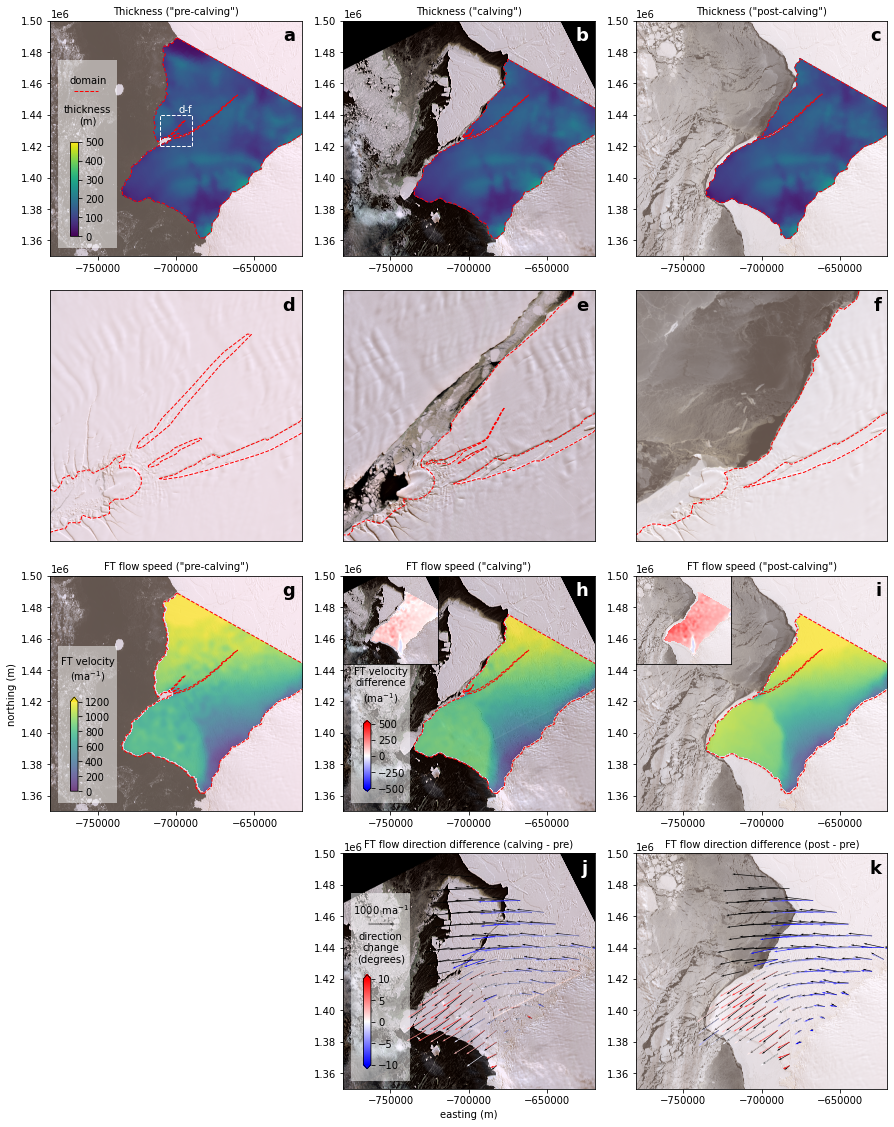

In [17]:
gr = 0.4
vvmin = 0
vvmax = 1200
vdmin = -500
vdmax = 500

xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

xmin_mir = -710000
xmax_mir = -690000
ymin_mir = 1420000 
ymax_mir = 1440000

fig = plt.figure(figsize=(15, 20))

gs = gridspec.GridSpec(8, 6, wspace=0.4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:2,0:2])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax1)
colors_thick = icepack.plot.tripcolor(h_2020, vmin=0, vmax=500, axes=ax1)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax1.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax1.add_patch(Rectangle((-775000,1355000),37500,120000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes1 = inset_axes(ax1, width="3%", height="40%",loc='lower left',borderpad=2)
cbar1 = plt.colorbar(colors_thick,cax=cbaxes1, ticks=[0,100,200,300,400,500])
ax1.annotate("thickness\n(m)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        
ax1.plot([-765000,-750000],[1455000,1455000],linewidth=1, color='r', linestyle='--')
ax1.annotate("domain",(-775000+(37500/2),1465000),size=10,ha='center',va='top')

ax1.plot([xmin_mir,xmin_mir,xmax_mir,xmax_mir,xmin_mir],\
           [ymin_mir,ymax_mir,ymax_mir,ymin_mir,ymin_mir],\
           '--',color='w',linewidth=1)

ax1.annotate('d-f',(xmax_mir,ymax_mir+100),size=10,color='w',ha='right',va='bottom')

ax2 = plt.subplot(gs[0:2,2:4])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax2)
icepack.plot.tripcolor(h_calv, vmin=0, vmax=500, axes=ax2)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax2.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax3 = plt.subplot(gs[0:2,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax3)
icepack.plot.tripcolor(h_2021, vmin=0, vmax=500, axes=ax3)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax3.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')


#--------------------------------------------------
ax11 = plt.subplot(gs[2:4,0:2])
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax11)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax11.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax12 = plt.subplot(gs[2:4,2:4])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax12)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax12.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax13 = plt.subplot(gs[2:4,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax13)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax13.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')


#--------------------------------------------------
ax4 = plt.subplot(gs[4:6,0:2])
hidden_vel = ax4.imshow(vel_pre_FT_vv, alpha=0.75, vmin=vvmin, vmax=vvmax)
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax4)
show(vel_pre_FT_vv,ax=ax4,transform=vel_pre_FT_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax4.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax4.add_patch(Rectangle((-775000,1355000),37500,100000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes4 = inset_axes(ax4, width="3%", height="40%",loc='lower left',borderpad=2)
cbar4 = plt.colorbar(hidden_vel,cax=cbaxes4, ticks=[0,200,400,600,800,1000,1200],extend='max')
ax4.annotate("FT velocity\n(ma$^{-1}$)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        

ax5 = plt.subplot(gs[4:6,2:4])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax5)
show(vel_calve_FT_vv,ax=ax5,transform=vel_calve_FT_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax5.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

axins5 = ax5.inset_axes([0.0, 0.625, 0.375, 0.375])
veldif_hidden = axins5.imshow(vel_calve_FT_pre_FT, cmap="bwr", vmin=vdmin, vmax=vdmax)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=axins5)
show(vel_calve_FT_pre_FT, transform=vel_pre_FT_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=axins5)
       
ax5.add_patch(Rectangle((-775000,1355000),37500,100000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxesins5 = inset_axes(ax5, width="3%", height="30%",loc='lower left',borderpad=2)
cbarins5 = plt.colorbar(veldif_hidden,cax=cbaxesins5, ticks=[-500,-250,0,250,500],extend='both')
ax5.annotate("FT velocity\ndifference\n(ma$^{-1}$)",(-775000+(37500/2),1430000),size=10,ha='center',va='center')        
       
        
ax6 = plt.subplot(gs[4:6,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax6)
show(vel_post_FT_vv,ax=ax6,transform=vel_post_FT_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax6.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')
        
axins6 = ax6.inset_axes([0.0, 0.625, 0.375, 0.375])       
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=axins6)
show(vel_post_FT_pre_FT, transform=vel_pre_FT_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=axins6)
       


#--------------------------------------------------
#ax7 = plt.subplot(gs[4:6,2:4])
#veldif_hidden = ax7.imshow(vel_calve_FT_pre_FT, cmap="bwr", vmin=vdmin, vmax=vdmax)
#show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax7)
#show(vel_calve_FT_pre_FT, transform=vel_pre_FT_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=ax7)

#ax7.add_patch(Rectangle((-775000,1355000),37500,100000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
#cbaxes7 = inset_axes(ax7, width="3%", height="40%",loc='lower left',borderpad=2)
#cbar7 = plt.colorbar(veldif_hidden,cax=cbaxes7, ticks=[-500,-250,0,250,500],extend='both')
#ax7.annotate("FT velocity\ndifference\n(m/yr)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        

#ax8 = plt.subplot(gs[4:6,4:6])
#show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax8)
#show(vel_post_FT_pre_FT, transform=vel_pre_FT_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=ax8)


#--------------------------------------------------
ang_diff_thres = 10
skip_FT = 30
mscale = 10000
mwidth = 0.0025
mx_FT = np.linspace(vel_pre_FT_vx_open.transform[2],vel_pre_FT_vx_open.transform[2]+(vel_pre_FT_vx_open.transform[0]*np.shape(vel_pre_FT_vx)[0]),num=np.shape(vel_pre_FT_vx)[0])
my_FT = np.linspace(vel_pre_FT_vx_open.transform[5],vel_pre_FT_vx_open.transform[5]+(vel_pre_FT_vx_open.transform[4]*np.shape(vel_pre_FT_vx)[1]),num=np.shape(vel_pre_FT_vx)[1])
xmesh_FT,ymesh_FT = np.meshgrid(mx_FT,my_FT)

ax9 = plt.subplot(gs[6:8,2:4])
angdif_hidden = ax9.imshow(angle_calve_FT_pre_FT, cmap="bwr", vmin=-1*ang_diff_thres, vmax=ang_diff_thres)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax9)

#pre-calving quiver (black)
Q_pre1 = ax9.quiver(xmesh_FT[ ::skip_FT, ::skip_FT],ymesh_FT[ ::skip_FT, ::skip_FT],
                 vel_pre_FT_vx[ ::skip_FT, ::skip_FT], vel_pre_FT_vy[ ::skip_FT, ::skip_FT],
                 scale = mscale, color='k', width=mwidth)
#calving quiver (angular difference)
Q_calv = ax9.quiver(xmesh_FT[ ::skip_FT, ::skip_FT],ymesh_FT[ ::skip_FT, ::skip_FT],
                 vel_calve_FT_vx[ ::skip_FT, ::skip_FT], vel_calve_FT_vy[ ::skip_FT, ::skip_FT],
                 angle_calve_FT_pre_FT[ ::skip_FT, ::skip_FT], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                 scale = mscale, width=mwidth)

ax9.add_patch(Rectangle((-775000,1355000),37500,120000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes9 = inset_axes(ax9, width="3%", height="40%",loc='lower left',borderpad=2)
cbar9 = plt.colorbar(angdif_hidden,cax=cbaxes9, ticks=[-1*ang_diff_thres,-0.5*ang_diff_thres,0,0.5*ang_diff_thres,ang_diff_thres], extend='both')
ax9.quiverkey(Q_pre1, 0.15,0.7, 1000, r'1000 ma$^{-1}$')
ax9.annotate("direction\nchange\n(degrees)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        

ax10 = plt.subplot(gs[6:8,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax10)

#pre-calving quiver (black)
Q_pre2 = ax10.quiver(xmesh_FT[ ::skip_FT, ::skip_FT],ymesh_FT[ ::skip_FT, ::skip_FT],
                 vel_pre_FT_vx[ ::skip_FT, ::skip_FT], vel_pre_FT_vy[ ::skip_FT, ::skip_FT],
                 scale = mscale, color='k', width=mwidth)
#post-calving quiver (angular difference)
Q_post = ax10.quiver(xmesh_FT[ ::skip_FT, ::skip_FT],ymesh_FT[ ::skip_FT, ::skip_FT],
                 vel_post_FT_vx[ ::skip_FT, ::skip_FT], vel_post_FT_vy[ ::skip_FT, ::skip_FT],
                 angle_post_FT_pre_FT[ ::skip_FT, ::skip_FT], norm=plt.Normalize(vmin=-1*ang_diff_thres, vmax=ang_diff_thres),cmap="bwr",
                 scale = mscale, color='r', width=mwidth)


#--------------------------------------------------
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)
ax11.set_xlim(xmin_mir,xmax_mir)
ax11.set_ylim(ymin_mir,ymax_mir)
ax11.set_xticklabels([])
ax11.set_yticklabels([])
ax11.set_xticks([])
ax11.set_yticks([])
ax12.set_xlim(xmin_mir,xmax_mir)
ax12.set_ylim(ymin_mir,ymax_mir)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.set_xticks([])
ax12.set_yticks([])
ax13.set_xlim(xmin_mir,xmax_mir)
ax13.set_ylim(ymin_mir,ymax_mir)
ax13.set_xticklabels([])
ax13.set_yticklabels([])
ax13.set_xticks([])
ax13.set_yticks([])
ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax4.locator_params(axis='x', nbins=3)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax5.locator_params(axis='x', nbins=3)
ax6.set_xlim(xmin,xmax)
ax6.set_ylim(ymin,ymax)
ax6.locator_params(axis='x', nbins=3)
#ax7.set_xlim(xmin,xmax)
#ax7.set_ylim(ymin,ymax)
#ax7.locator_params(axis='x', nbins=3)
#ax8.set_xlim(xmin,xmax)
#ax8.set_ylim(ymin,ymax)
#ax8.locator_params(axis='x', nbins=3)
ax9.set_xlim(xmin,xmax)
ax9.set_ylim(ymin,ymax)
ax9.locator_params(axis='x', nbins=3)
ax10.set_xlim(xmin,xmax)
ax10.set_ylim(ymin,ymax)
ax10.locator_params(axis='x', nbins=3)
axins5.set_xlim(xmin,xmax)
axins5.set_ylim(ymin,ymax)
axins5.set_xticklabels([])
axins5.set_yticklabels([])
axins5.set_xticks([])
axins5.set_yticks([])
axins6.set_xlim(xmin,xmax)
axins6.set_ylim(ymin,ymax)
axins6.set_xticklabels([])
axins6.set_yticklabels([])
axins6.set_xticks([])
axins6.set_yticks([])

ax1.annotate('a',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax2.annotate('b',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax3.annotate('c',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax11.annotate('d',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')
ax12.annotate('e',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')
ax13.annotate('f',(xmax_mir-((0.025)*(xmax_mir-xmin_mir)),ymax_mir-(0.025*(ymax_mir-ymin_mir))),size=18,weight='bold',ha='right',va='top')
ax4.annotate('g',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax5.annotate('h',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax6.annotate('i',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
#ax7.annotate('g',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
#ax8.annotate('h',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax9.annotate('j',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax10.annotate('k',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title(label='Thickness ("pre-calving")',fontsize=10)
ax2.set_title(label='Thickness ("calving")',fontsize=10)
ax3.set_title(label='Thickness ("post-calving")',fontsize=10)
ax4.set_title(label='FT flow speed ("pre-calving")',fontsize=10)
ax5.set_title(label='FT flow speed ("calving")',fontsize=10)
ax6.set_title(label='FT flow speed ("post-calving")',fontsize=10)
#ax7.set_title(label='FT flow speed difference (calving - pre)',fontsize=10)
#ax8.set_title(label='FT flow speed difference (post - pre)',fontsize=10)
ax9.set_title(label='FT flow direction difference (calving - pre)',fontsize=10)
ax10.set_title(label='FT flow direction difference (post - pre)',fontsize=10)


ax9.set_xlabel('easting (m)')
ax4.set_ylabel('northing (m)')

output = './figures/figS16_model_inputs.png'
plt.savefig(output, dpi=300, bbox_inches='tight')

plt.show()

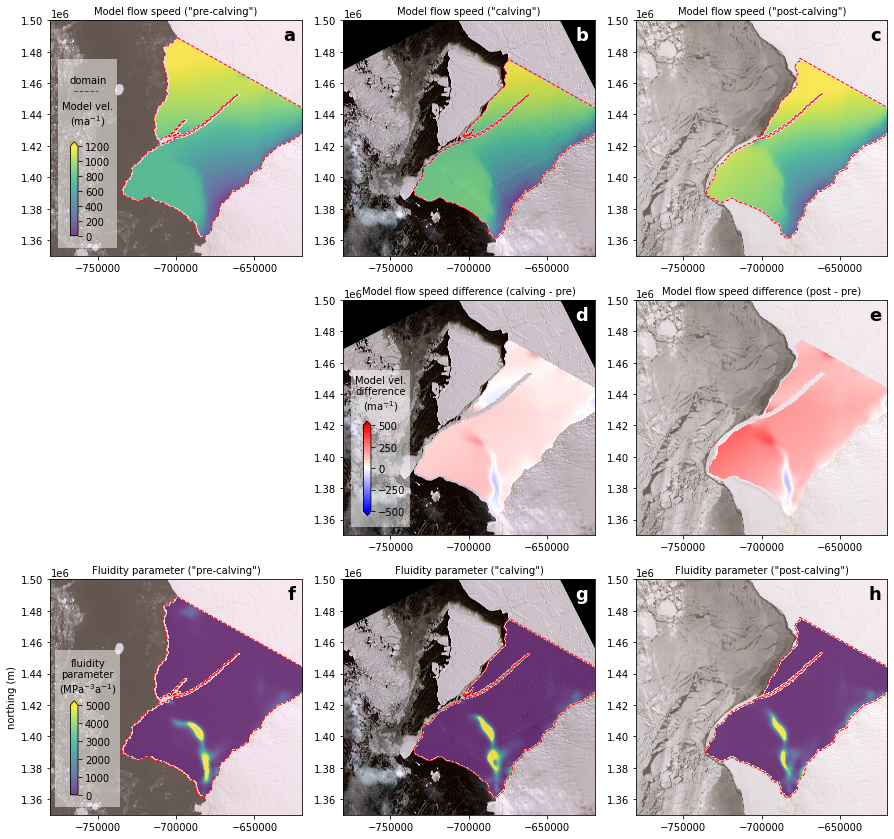

In [18]:
gr = 0.4
vvmin = 0
vvmax = 1200
vdmin = -500
vdmax = 500

viscmin = 0
viscmax = 1
viscdmin = -200
viscdmax = 200

xmin = -780000
xmax = -620000 #160000 wide
ymin = 1350000 
ymax = 1500000 #150000 tall

fig = plt.figure(figsize=(15, 15))

gs = gridspec.GridSpec(6, 6, wspace=0.4)

#--------------------------------------------------
ax1 = plt.subplot(gs[0:2,0:2])
hidden_vel = ax1.imshow(vel_pre_vv, alpha=0.75, vmin=vvmin, vmax=vvmax)
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax1)
show(vel_pre_vv,ax=ax1,transform=vel_pre_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax1.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax1.add_patch(Rectangle((-775000,1355000),37500,120000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes1 = inset_axes(ax1, width="3%", height="40%",loc='lower left',borderpad=2)
cbar1 = plt.colorbar(hidden_vel,cax=cbaxes1, ticks=[0,200,400,600,800,1000,1200],extend='max')
ax1.annotate("Model vel.\n(ma$^{-1}$)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        
ax1.plot([-765000,-750000],[1455000,1455000],linewidth=1, color='r', linestyle='--')
ax1.annotate("domain",(-775000+(37500/2),1465000),size=10,ha='center',va='top')

ax2 = plt.subplot(gs[0:2,2:4])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax2)
show(vel_calve_vv,ax=ax2,transform=vel_calve_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax2.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax3 = plt.subplot(gs[0:2,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax3)
show(vel_post_vv,ax=ax3,transform=vel_post_vx_open.transform,alpha=0.75,vmin=vvmin,vmax=vvmax)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax3.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')


#--------------------------------------------------
ax4 = plt.subplot(gs[2:4,2:4])
veldif_hidden = ax4.imshow(vel_calve_FT_pre_FT, cmap="bwr", vmin=vdmin, vmax=vdmax)
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax4)
show(vel_calve_pre, transform=vel_pre_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=ax4)

ax4.add_patch(Rectangle((-775000,1355000),37500,100000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes4 = inset_axes(ax4, width="3%", height="40%",loc='lower left',borderpad=2)
cbar4 = plt.colorbar(veldif_hidden,cax=cbaxes4, ticks=[-500,-250,0,250,500],extend='both')
ax4.annotate("Model vel.\ndifference\n(ma$^{-1}$)",(-775000+(37500/2),1440000),size=10,ha='center',va='center')        

ax5 = plt.subplot(gs[2:4,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax5)
show(vel_post_pre, transform=vel_pre_vx_open.transform, cmap="bwr", vmin=vdmin, vmax=vdmax, ax=ax5)

#--------------------------------------------------
fmin = 0
fmax = 5000

ax6 = plt.subplot(gs[4:6,0:2])
hidden_f = ax6.imshow(fluid_pre, alpha=0.75, vmin=fmin, vmax=fmax)
show(ls_pre_merged_norm.transpose(2,0,1), transform=landsat_B2_pre_merged.transform, ax=ax6)
show(fluid_pre,ax=ax6,transform=fluid_pre_open.transform, alpha=0.75,vmin=fmin,vmax=fmax)

for feature in outline_2020["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax6.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax6.add_patch(Rectangle((-777000,1355000),41500,100000,edgecolor = 'none',facecolor = 'white',alpha = 0.5))
cbaxes6 = inset_axes(ax6, width="3%", height="40%",loc='lower left',borderpad=2)
cbar6 = plt.colorbar(hidden_f,cax=cbaxes6, ticks=[0,1000,2000,3000,4000,5000],extend='max')        
ax6.annotate("fluidity\nparameter\n(MPa$^{-3}$a$^{-1}$)",(-775000+(37500/2),1450000),size=10,ha='center',va='top')

ax7 = plt.subplot(gs[4:6,2:4])
show(s2_calve_norm1.transpose(2,0,1), transform=img1_2.transform, ax=ax7)
show(fluid_calve,ax=ax7,transform=fluid_pre_open.transform, alpha=0.75,vmin=fmin,vmax=fmax)

for feature in outline_calv["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax7.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')

ax8 = plt.subplot(gs[4:6,4:6])
show(ls_post_merged_norm.transpose(2,0,1), transform=landsat_B2_post_merged.transform, ax=ax8)
show(fluid_post,ax=ax8,transform=fluid_pre_open.transform, alpha=0.75,vmin=fmin,vmax=fmax)

for feature in outline_2021["features"]:
    for line_string in feature["geometry"]["coordinates"]:
        xs = np.array(line_string)
        ax8.plot(xs[:, 0], xs[:, 1], linewidth=1, color='r', linestyle='--')
        
#--------------------------------------------------
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.locator_params(axis='x', nbins=3)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin,ymax)
ax2.locator_params(axis='x', nbins=3)
ax3.set_xlim(xmin,xmax)
ax3.set_ylim(ymin,ymax)
ax3.locator_params(axis='x', nbins=3)
ax4.set_xlim(xmin,xmax)
ax4.set_ylim(ymin,ymax)
ax4.locator_params(axis='x', nbins=3)
ax5.set_xlim(xmin,xmax)
ax5.set_ylim(ymin,ymax)
ax5.locator_params(axis='x', nbins=3)
ax6.set_xlim(xmin,xmax)
ax6.set_ylim(ymin,ymax)
ax6.locator_params(axis='x', nbins=3)
ax7.set_xlim(xmin,xmax)
ax7.set_ylim(ymin,ymax)
ax7.locator_params(axis='x', nbins=3)
ax8.set_xlim(xmin,xmax)
ax8.set_ylim(ymin,ymax)
ax8.locator_params(axis='x', nbins=3)

ax1.annotate('a',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax2.annotate('b',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax3.annotate('c',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax4.annotate('d',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax5.annotate('e',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax6.annotate('f',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')
ax7.annotate('g',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,color='w',weight='bold',ha='right',va='top')
ax8.annotate('h',(xmax-((0.025)*(xmax-xmin)),ymax-(0.025*(ymax-ymin))),size=18,weight='bold',ha='right',va='top')

ax1.set_title(label='Model flow speed ("pre-calving")',fontsize=10)
ax2.set_title(label='Model flow speed ("calving")',fontsize=10)
ax3.set_title(label='Model flow speed ("post-calving")',fontsize=10)
ax4.set_title(label='Model flow speed difference (calving - pre)',fontsize=10)
ax5.set_title(label='Model flow speed difference (post - pre)',fontsize=10)
ax6.set_title(label='Fluidity parameter ("pre-calving")',fontsize=10)
ax7.set_title(label='Fluidity parameter ("calving")',fontsize=10)
ax8.set_title(label='Fluidity parameter ("post-calving")',fontsize=10)
    
ax9.set_xlabel('easting (m)')
ax6.set_ylabel('northing (m)')

output = './figures/figS17_model_outputs_fluidity.png'
plt.savefig(output, dpi=300, bbox_inches='tight')

plt.show()
